In [ ]:
import pandas as pd

In [ ]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [ ]:
tables = pd.read_html(url)

In [ ]:
my_table = tables[12]

Вивести перші рядки таблиці за допомогою методу head

In [77]:
my_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)


In [75]:
my_table.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN


In [76]:
my_table.replace("—", float("NaN"), inplace=True)

Визначте типи всіх стовпців за допомогою dataframe.dtypes


In [80]:
types = my_table.dtypes
types

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [79]:
my_table["2014"] = my_table["2014"].astype(float)
my_table["2019"] = my_table["2019"].astype(float)


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [86]:
for column in my_table.columns:
    missing_percentage = my_table[column].isnull().sum() / my_table.shape[0]
    if missing_percentage:
      print(f"Колонка '{column}': {missing_percentage:.1%}")


Колонка '1950': 7.4%
Колонка '1960': 3.7%
Колонка '1970': 3.7%
Колонка '2014': 7.4%
Колонка '2019': 14.8%


Видаліть з таблиці дані по всій країні, останній рядок таблиці


In [85]:
my_table = my_table.drop(index=my_table.shape[0]-1)
my_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)


In [87]:
my_table = my_table.fillna(value=my_table.mean())
my_table

<ipython-input-87-2c34fad68c0f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_table = my_table.fillna(value=my_table.mean())


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні


In [89]:
avg_birth_rate_2019 = my_table['2019'].mean()
higher_than_avg = my_table[my_table['2019'] > avg_birth_rate_2019]['Регіон'].tolist()
print(higher_than_avg)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


У якому регіоні була найвища народжуваність у 2014 році?


In [90]:
region_max_births = my_table.nlargest(1, "2014")["Регіон"].values[0]
print(region_max_births)

Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році


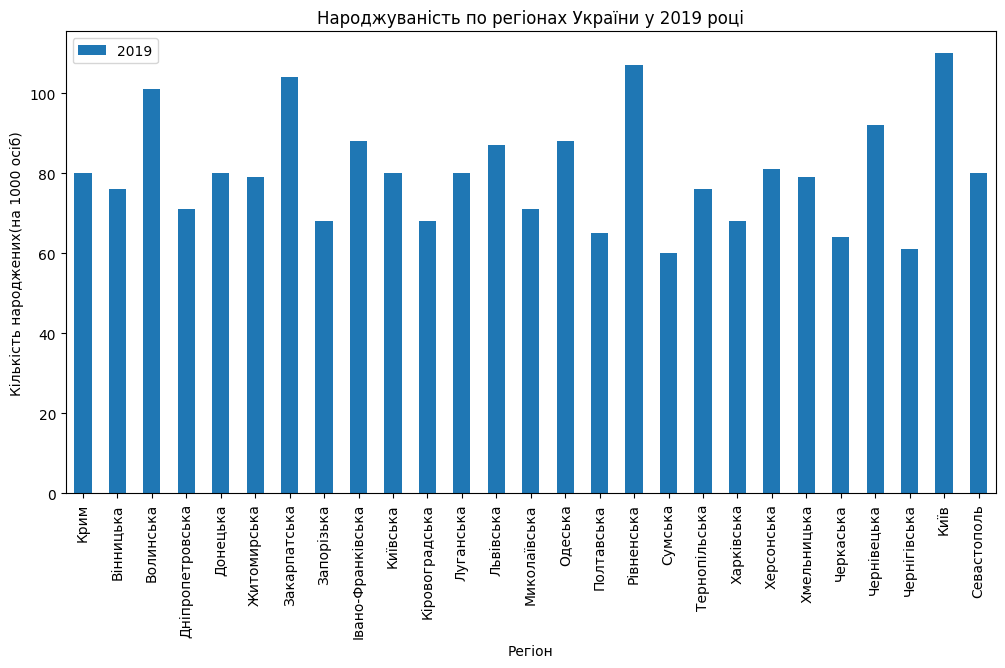

In [92]:
import matplotlib.pyplot as plt
my_table.plot(x='Регіон', y='2019', kind='bar', figsize=(12, 6))
plt.title('Народжуваність по регіонах України у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Кількість народжених(на 1000 осіб)')
plt.show()
